In [47]:
import pandas as pd
import numpy as np
df = pd.read_csv('Data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
''' df.replace({0:None}, inplace=True)
df['Outcome'].replace({None:0}, inplace=True)
df['Pregnancies'].replace({None:0}, inplace=True)
df.dropna(axis=0, thresh=8, inplace=True)
df.replace({np.nan:0}, inplace=True) '''

" df.replace({0:None}, inplace=True)\ndf['Outcome'].replace({None:0}, inplace=True)\ndf['Pregnancies'].replace({None:0}, inplace=True)\ndf.dropna(axis=0, thresh=8, inplace=True)\ndf.replace({np.nan:0}, inplace=True) "

In [50]:
df.head(50)
target = df.Outcome
inputs = df.drop('Outcome', axis='columns')

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    inputs, target, test_size=0.3)


In [52]:
import numpy as np
from sklearn.impute import SimpleImputer
X_train.drop('Insulin', axis=1, inplace=True)
X_test.drop('Insulin', axis=1, inplace=True)

cols = ('Glucose', 'BloodPressure', 'SkinThickness', 'BMI')
## Impute the numerical values to the mean
imp_mean = SimpleImputer(missing_values=0, strategy='mean')
for col in cols:
    X_train[col] = imp_mean.fit_transform(
        X_train[col].to_numpy().reshape(-1, 1))
    X_test[col] = imp_mean.fit_transform(
        X_test[col].to_numpy().reshape(-1, 1))


# Set the too high bloodpressure to zero
for idx, value in enumerate(X_train['BloodPressure']):
    if not pd.isna(value):
        mean = pd.Series.mean(X_train['BloodPressure'])
        stddev = pd.Series.std(X_train['BloodPressure'])
        upper = mean + 3*stddev
        if (value > upper):
            X_train['BloodPressure'].iloc[idx] = 0
## Impute the numerical values to the mean
imp_mean = SimpleImputer(missing_values=0, strategy='mean')
X_test['BloodPressure'] = imp_mean.fit_transform(
    X_test['BloodPressure'].to_numpy().reshape(-1, 1))

# Same for testing set with
for idx, value in enumerate(X_test['BloodPressure']):
    if not pd.isna(value):
        mean = pd.Series.mean(X_test['BloodPressure'])
        stddev = pd.Series.std(X_test['BloodPressure'])
        upper = mean + 3*stddev
        if (value > upper):
            X_test['BloodPressure'].iloc[idx] = 0
## Impute the numerical values to the mean
imp_mean = SimpleImputer(missing_values=0, strategy='mean')
X_test['BloodPressure'] = imp_mean.fit_transform(
    X_test['BloodPressure'].to_numpy().reshape(-1, 1))


D:\Users\Darrell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Darrell\AppData\Local\Temp/ipykernel_55256/2725316522.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = imp_mean.fit_transform(
C:\Users\Darrell\AppData\Local\Temp/ipykernel_55256/2725316522.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [53]:
len(X_train)

537

In [54]:
len(X_test)

231

In [55]:
len(df)

768

In [56]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [57]:
model.fit(X_train, y_train)

GaussianNB()

In [58]:
model.score(X_test, y_test)

0.7748917748917749

In [59]:
X_test[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
229,0,117.0,80.0,31.000000,45.2,0.089,24
57,0,100.0,88.0,60.000000,46.8,0.962,31
438,1,97.0,70.0,15.000000,18.2,0.147,21
481,0,123.0,88.0,37.000000,35.2,0.197,29
694,2,90.0,60.0,30.128492,23.5,0.191,25
425,4,184.0,78.0,39.000000,37.0,0.264,31
251,2,129.0,84.0,30.128492,28.0,0.284,27
552,6,114.0,88.0,30.128492,27.8,0.247,66
2,8,183.0,64.0,30.128492,23.3,0.672,32
610,3,106.0,54.0,21.000000,30.9,0.292,24


In [60]:
y_test[:10]

229    0
57     0
438    0
481    0
694    0
425    1
251    0
552    0
2      1
610    0
Name: Outcome, dtype: int64

In [61]:
model.predict(X_test[:10])

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

Do the ROC curve for each

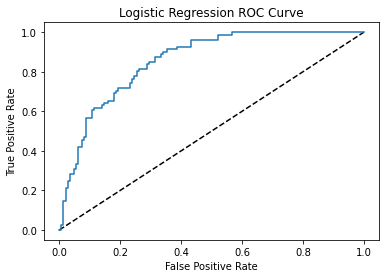

In [62]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


Final C hyperparameter: [0.00599484]
Score Logistic: 0.7835497835497836
Score NB: 0.7748917748917749
Confusion Matrix: Logistic
[[133  17]
 [ 33  48]]
Confusion Matrix: Naive Bayes
[[126  24]
 [ 28  53]]


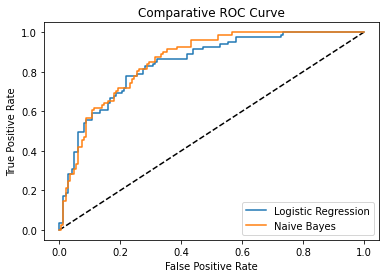

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV

regLogit = LogisticRegressionCV().fit(X_train, y_train)
print(f"Final C hyperparameter: {regLogit.C_}")

# Check on the testing dataset
print(f"Score Logistic: {regLogit.score(X_test, y_test)}")
print(f"Score NB: {model.score(X_test, y_test)}")

predictions_testLog = regLogit.predict(X_test)
predictions_testNB = model.predict(X_test)
print("Confusion Matrix: Logistic")
print(confusion_matrix(y_test, predictions_testLog))
print("Confusion Matrix: Naive Bayes")
print(confusion_matrix(y_test, predictions_testNB))

# ROC Curve
y_pred_probLog = regLogit.predict_proba(X_test)[:, 1]
fprLog, tprLog, thresholdLog = roc_curve(y_test, y_pred_probLog)
y_pred_probNB = model.predict_proba(X_test)[:, 1]
fprNB, tprNB, thresholdNB = roc_curve(y_test, y_pred_probNB)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprLog, tprLog, label="Logistic Regression")
plt.plot(fprNB, tprNB, label="Naive Bayes")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curve')
plt.legend()
plt.show()
